In [226]:
import numpy as np
import matplotlib.pyplot as plt

# ----- make nice figures -----
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
# -----------------------------

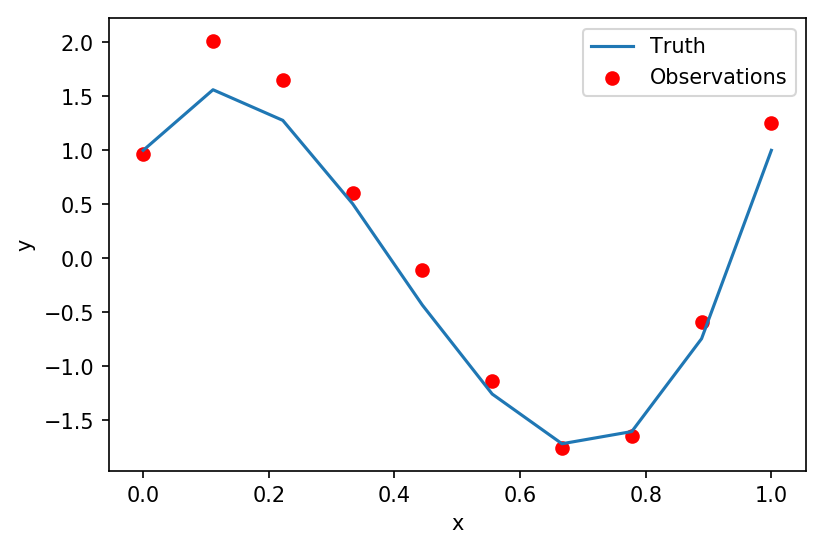

In [299]:
data = np.loadtxt('lec_14.txt')
x_data = data[:, 0]
y_data = data[:, 1]

num_points = len(y_data)

plt.plot(x_data, y_truth)
plt.scatter(x_data, y_data, color='r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['Truth', 'Observations'])

In [300]:
num_training = int(0.8*num_points)
x_training = x_data[0:num_training]
y_training = y_data[0:num_training]
x_validation = x_data[num_training:num_points]
y_validation = y_data[num_training:num_points]

In [301]:
Phi_training = np.vander(x_training, 5, increasing = True)
Phi_validation = np.vander(x_validation, 5, increasing = True)

In [302]:
theta_ls = np.linalg.lstsq(Phi_training, y_training, rcond=None)[0]

# Predict validation data
y_validation_prediction = Phi_validation @ theta_ls

# Relative error
r = y_validation_prediction - y_validation
rel_err = np.linalg.norm(r)/np.linalg.norm(y_validation)
print("Relative Error = " + str(rel_err))

Relative Error = 1.2725794023428876


In [303]:
# Bayesian linear regression
mu = [0., 5., -45., 40., -5.]
Sigma = 50**2*np.identity(5)
B = np.linalg.inv(Sigma)

beta = 1/sig_W**2
mu_posterior = np.linalg.inv(beta*Phi_training.T @ Phi_training + B) @ (beta*Phi_training.T@y_training + B@mu)
theta_bayes = mu_posterior

# Predict validation data
y_validation_prediction = Phi_validation @ theta_bayes

# Relative error
r = y_validation_prediction - y_validation
rel_err = np.linalg.norm(r)/np.linalg.norm(y_validation)
print("Relative Error = " + str(rel_err))

Relative Error = 0.14049850676893286


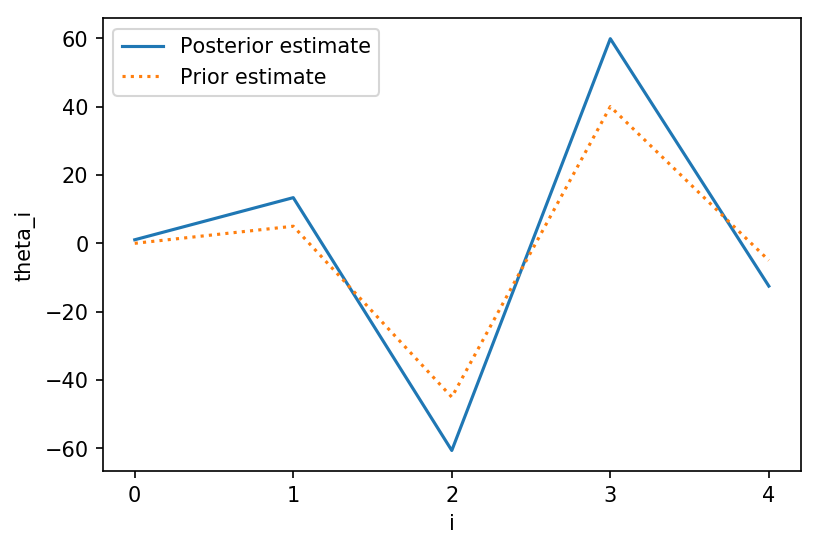

In [304]:
# Plot prior and posterior mean estimates
plt.plot(theta_bayes)
plt.plot(mu, ls = ':')
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel('i')
plt.ylabel('theta_i')
plt.legend(['Posterior estimate', 'Prior estimate'])

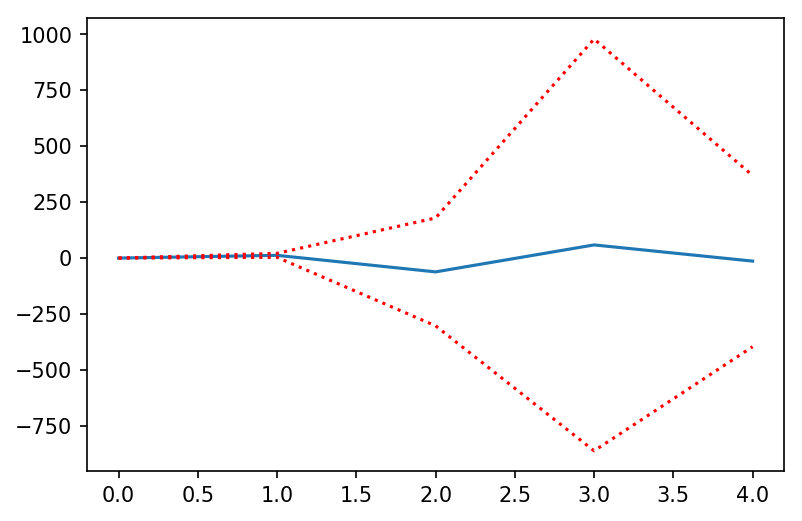

In [297]:
# plot posterior uncertainty
Sigma_posterior = np.linalg.inv(beta*Phi_training.T @ Phi_training + B)
sig_posterior = np.diag(Sigma_posterior)

plt.plot(theta_bayes)
plt.plot(theta_bayes - sig_posterior, color='r', ls = ':')
plt.plot(theta_bayes + sig_posterior, color ='r', ls=':')

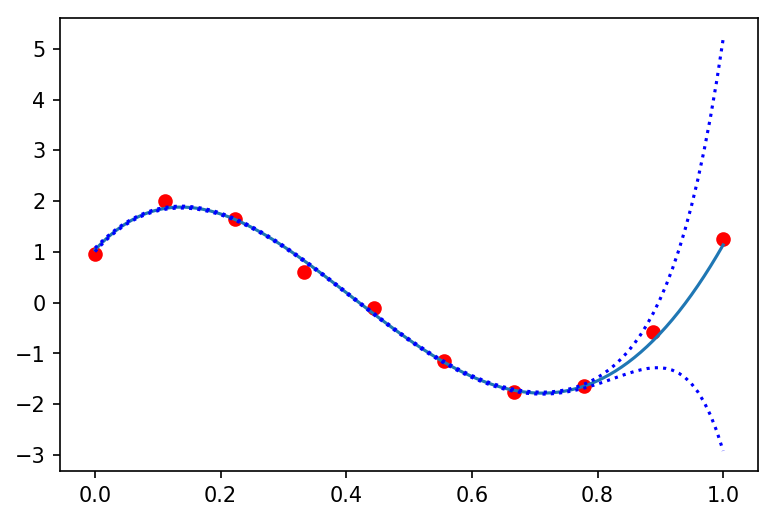

In [298]:
x_plot = np.linspace(0, 1, 100)
Phi_plot = np.vander(x_plot, 5, increasing=True)

mu_y = Phi_plot @ theta_bayes
Sigma_Y = Phi_plot @ Sigma_posterior @ Phi_plot.T
sig_y = np.diag(Sigma_Y)

plt.plot(x_plot, mu_y)
plt.plot(x_plot, mu_y + sig_y, color='b', ls = ':')
plt.plot(x_plot, mu_y - sig_y, color='b', ls = ':')
plt.scatter(x_data, y_data, color='r')